In [2]:
import os
from astropy.io import fits
from scipy.ndimage import median_filter, map_coordinates
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from glob import glob
from astropy.modeling import models
from astropy import coordinates as coord
from astropy import units as u
from gwcs import wcs
from gwcs import coordinate_frames as cf
import destreak 
#from image1overf import sub1fimaging

Text(0.5, 1.0, 'jw01074001001_02101_00001_nrca1_cal.fits')

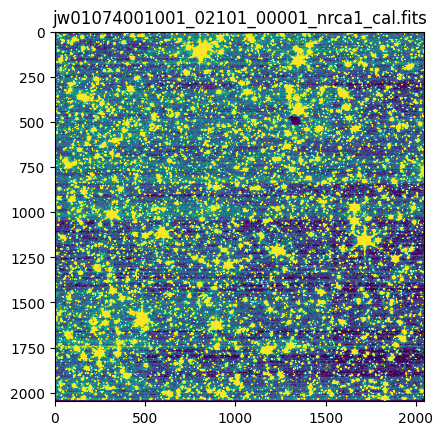

In [6]:
f = "data/jw01074001001_02101_00001_nrca1_cal.fits"
data = fits.open(f)['SCI'].data
plt.imshow(np.nan_to_num(data), vmin=0, vmax=1)
plt.title(f[5:])

In [7]:
out_destreak = destreak.destreak(f, percentile=10, median_filter_size=256, overwrite=True, write=True,
             #background_folder='/orange/adamginsburg/jwst/brick/images/',
             #background_mapping=background_mapping,
             use_background_map=False
             )
d = out_destreak
data_out_destreak = fits.open(d)['SCI'].data

Destreaking data/jw01074001001_02101_00001_nrca1_cal.fits


/home/savannahgramze/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [8]:
data = data_out_destreak

Text(0.5, 1.0, 'destreak')

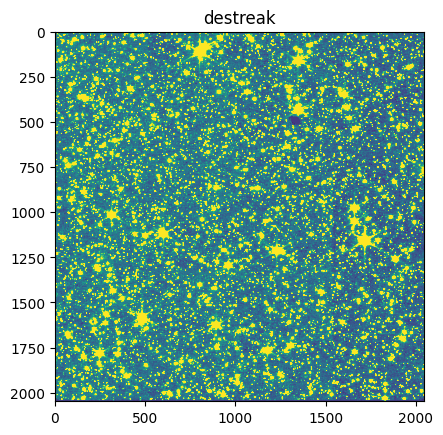

In [9]:
minn = 5
maxx = 90

d_min = np.nanpercentile(data_out_destreak.flatten(), minn)
d_max = np.nanpercentile(data_out_destreak.flatten(), maxx)
plt.imshow(np.nan_to_num(data_out_destreak), vmin=d_min, vmax=d_max)
plt.title("destreak")

In [10]:
from photutils.detection import DAOStarFinder
from photutils.psf import PSFPhotometry
from photutils.background import LocalBackground, MMMBackground
import webbpsf

In [12]:
nc = webbpsf.NIRCam()
nc.filter = fits.open(f)[0].header['FILTER'] # 'F200W'

OSError: Environment variable $WEBBPSF_PATH is not set!

 ***********  ERROR  ******  ERROR  ******  ERROR  ******  ERROR  ***********
 *                                                                          *
 *  WebbPSF requires several data files to operate.                         *
 *  These files could not be located automatically at this time, or this    *
 *  version of the software requires a newer set of reference files than    *
 *  you have installed.  For more details see:                              *
 *                                                                          *
 *        https://webbpsf.readthedocs.io/en/stable/installation.html        *
 *                                                                          *
 *  under "Installing the Required Data Files".                             *
 *  WebbPSF will not be able to function properly until the appropriate     *
 *  reference files have been downloaded to your machine and installed.     *
 *                                                                          *
 ****************************************************************************


In [11]:
bkgstat = MMMBackground()
localbkg_estimator = LocalBackground(5, 10, bkgstat)
finder = DAOStarFinder(10.0, 2.0)
psfphot = PSFPhotometry(psf_model, fit_shape, finder=finder,
                        grouper=grouper, aperture_radius=4,
                        localbkg_estimator=localbkg_estimator)
phot = psfphot(data, error=error)

NameError: name 'psf_model' is not defined